In [27]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# load data
heart = pd.read_csv('heart_disease.csv')

print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


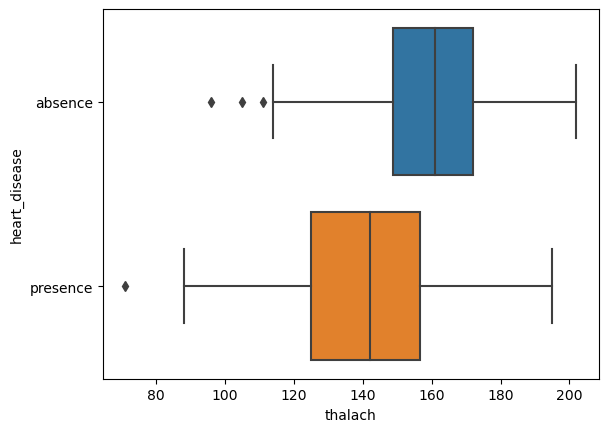

In [28]:
sns.boxplot(x = heart.thalach, y = heart.heart_disease)
plt.show()

In [29]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

In [30]:
print("The mean difference is: {}".format(np.mean(thalach_hd) - np.mean(thalach_no_hd)))
print("The median difference is: {}".format(np.median(thalach_hd) - np.median(thalach_no_hd)))

The mean difference is: -19.11905597473242
The median difference is: -19.0


In [31]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)
print("There is a significant difference in average for people with heart \n" 
      "disease compared to people with no heart disease, supported with a P value of {}".format(pval))

3.456964908430172e-14
There is a significant difference in average for people with heart 
disease compared to people with no heart disease, supported with a P value of 3.456964908430172e-14


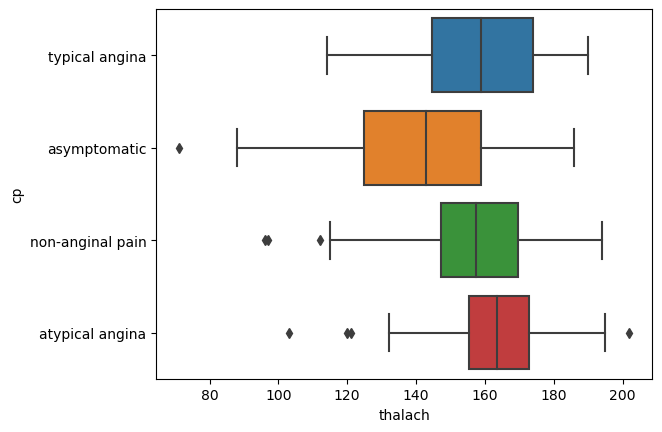

In [32]:
plt.clf()
sns.boxplot(x = heart.thalach, y = heart.cp)
plt.show()

In [33]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

In [34]:
from scipy.stats import f_oneway
fstat, pvalu = f_oneway(thalach_typical,thalach_asymptom,thalach_nonangin,thalach_atypical)
print(pvalu)

1.9065505247705008e-10


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


In [36]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [37]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(Xtab)
print(pvalue)

1.2517106007837527e-17
